<a href="https://www.kaggle.com/code/oakthyago/machines-love-decimal-time?scriptVersionId=111218154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

Did you ever hear that time would be more logical with was conting in decimal not in a 12 base? Well the computer also enjoys the decimal time and we did this transformation here.

Some machine learning and Neural Networks don't work with datetime and in a timeseries dataset this is a important information.

On this code we will develop a scrip to transform any datetime hour information in a 0 to 10 decimal time information (more natural to human visualization)
that can be easily adapted to 0 to 1 ( the usual machine range)

In [2]:
#getting datetime information
#df = pd.read_csv("../input/solarenergynortheastbrazil/2_Paulino_newdata.csv")
df = pd.read_csv('../input/solarenergynortheastbrazil/2_Paulino_newdata.csv')
df2= df[["Time",'Total AC Output Power(W)']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26757 entries, 0 to 26756
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      26757 non-null  object 
 1   Total AC Output Power(W)  26757 non-null  float64
dtypes: float64(1), object(1)
memory usage: 418.2+ KB


In [3]:



df2.Time= pd.to_datetime(df2['Time'])

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Convertion

Unfortunatly the pd.datetime method is running with a copy and reading dataframe error but it does change the result.

Transforming all the time in seconds and knowing how much seconds we have into a day its possible to transform the 24h in a Decimal time range.

In [4]:
df2["second"] = pd.Series(df2["Time"]).dt.second
df2["minute"] = pd.Series(df2["Time"]).dt.minute
df2["hour"] = pd.Series(df2["Time"]).dt.hour
df2["seconds"] = df2["second"] + (df2["minute"]*60)+(df2["hour"]*3600) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [5]:
df2["DecimalTime"] = (df2["seconds"]*10)/86400


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df2["DecimalTime2"]=df2["DecimalTime"].round(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df2["DecimalTime2"].value_counts()

5.98    73
3.44    68
3.48    67
4.73    67
4.78    65
        ..
2.01     4
1.99     4
2.04     3
1.98     2
7.43     1
Name: DecimalTime2, Length: 545, dtype: int64

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:711: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


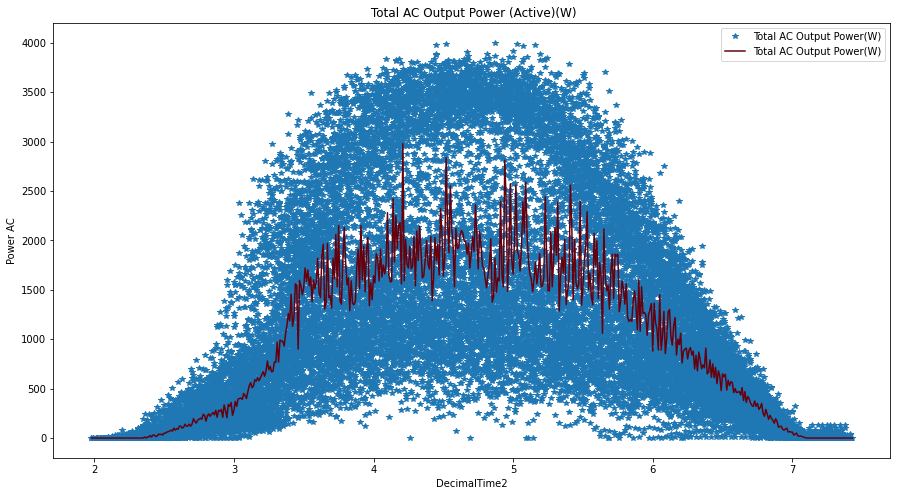

4000.0

In [8]:
#plant1_data.iplot(x= 'time', y='DC_POWER', xTitle='Time',  yTitle= 'DC Power', title='DC POWER plot')
df2.plot(x= 'DecimalTime2', y='Total AC Output Power(W)', style='.', figsize = (15, 8),marker='*')
df2.groupby('DecimalTime2')['Total AC Output Power(W)'].agg('median').plot(legend=True, colormap='Reds_r')
plt.ylabel('Power AC')
plt.title(' Total AC Output Power (Active)(W)')
plt.show()
plt.style.use("fivethirtyeight")
df2["Total AC Output Power(W)"].max()

In [9]:
a= np.array(df2["DecimalTime2"])
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

range_to_normalize = (0, 1)
normalized_array_1d = normalize(
    a, range_to_normalize[0], 
  range_to_normalize[1])



In [10]:
out = np.array(normalized_array_1d)
out = out.round(5)
df2["Norm"] = out

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:711: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


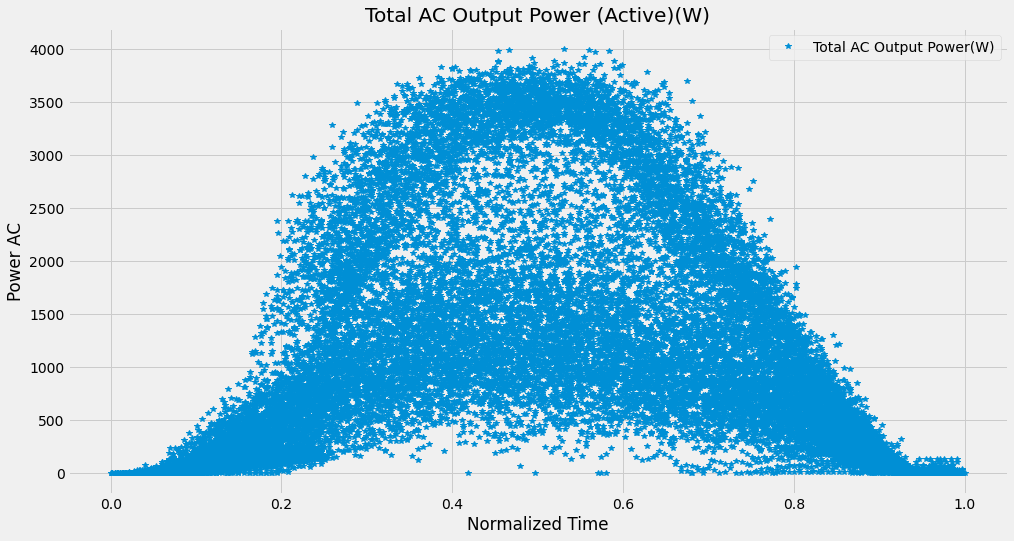

4000.0

In [11]:
#plant1_data.iplot(x= 'time', y='DC_POWER', xTitle='Time',  yTitle= 'DC Power', title='DC POWER plot')
df2.plot(x= 'Norm', y='Total AC Output Power(W)', style='.', figsize = (15, 8),marker='*')
#df2.groupby('Norm')['Total AC Output Power(W)'].agg('median').plot(legend=True, colormap='Reds_r')
plt.ylabel('Power AC')
plt.xlabel('Normalized Time')
plt.title('Total AC Output Power (Active)(W)')
plt.show()
plt.style.use("fivethirtyeight")
df2["Total AC Output Power(W)"].max()